# LABORATORIO 3


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

seed = 161

# Composicion de pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

# Regresion lineal
from sklearn.linear_model import LinearRegression

# Importar/ Exportar modelos
from joblib import dump, load

# Metricas
from sklearn.metrics import mean_squared_error as mse

# q-q plots
import scipy.stats as stats

Leemos el archivo

In [8]:
df=pd.read_csv('202210_Laboratorio3_data_DatosTrain.csv', sep=',', encoding = 'utf-8')

Miramos cuantas columnas y filas tiene

In [9]:
df.shape

(2644, 20)

Miramos los tipos de datos suministrados

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       2644 non-null   int64  
 1   Life expectancy                  2644 non-null   float64
 2   Adult Mortality                  2644 non-null   float64
 3   infant deaths                    2644 non-null   int64  
 4   Alcohol                          2644 non-null   float64
 5   percentage expenditure           2644 non-null   float64
 6   Hepatitis B                      2644 non-null   float64
 7   Measles                          2644 non-null   int64  
 8   BMI                              2644 non-null   float64
 9   under-five deaths                2644 non-null   int64  
 10  Polio                            2644 non-null   float64
 11  Total expenditure                2644 non-null   float64
 12  Diphtheria          

Miramos los primero 10 datos para echar un primer vistazo a los datos

In [11]:
# Ver primeros registros
df.head()

,Unnamed: 0,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Hacemos un análisis descriptivo de los datos para ver como se comportan sus valores

In [12]:
# Analisis descriptivo
df.describe()

,Unnamed: 0,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2644.00000,2644.000000,2644.000000,2644.00000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2.644000e+03,2644.000000,2644.000000,2644.000000,2644.000000
mean,1321.50000,69.068797,162.465204,31.14410,4.328684,792.465552,65.532905,2432.922844,37.662746,43.160363,81.967095,5.431078,81.926626,1.617095,6726.080237,1.052152e+07,4.743911,4.778215,0.602879,11.482678
std,763.40138,10.351757,121.186953,123.93232,4.146851,2077.768681,39.221347,11868.652439,20.339750,168.485929,24.521529,2.821982,24.502772,4.822150,13873.881462,5.680977e+07,4.467839,4.553418,0.244040,4.170684
min,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,660.75000,62.975000,73.000000,0.00000,0.407500,7.044565,14.750000,0.000000,18.900000,0.000000,78.000000,3.677500,78.000000,0.100000,238.626882,1.285900e+04,1.500000,1.500000,0.473000,9.500000
50%,1321.50000,72.100000,143.000000,2.00000,3.225000,70.648787,87.000000,14.000000,43.000000,3.000000,93.000000,5.550000,93.000000,0.100000,1254.652810,6.227965e+05,3.200000,3.200000,0.668000,12.300000
75%,1982.25000,75.800000,226.250000,18.00000,7.495000,485.959559,96.000000,329.750000,55.900000,23.000000,97.000000,7.372500,97.000000,0.800000,5277.746332,5.194999e+06,7.200000,7.300000,0.781000,14.200000
max,2643.00000,89.000000,699.000000,1800.00000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.240000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


**Limpieza**

In [13]:
df.drop("Unnamed: 0",axis=1)

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,72.5,147.0,0,1.08,4.783806,84.0,0,72.1,0,86.0,4.67,84.0,0.1,37.846563,1364.0,0.1,0.1,0.703,14.5
2640,72.6,145.0,0,1.10,569.625504,84.0,0,71.5,0,88.0,5.13,86.0,0.1,3392.647430,135.0,0.1,0.1,0.698,14.5
2641,72.5,146.0,0,2.05,568.869281,87.0,0,7.8,0,88.0,5.82,87.0,0.1,2932.315883,12357.0,0.1,0.1,0.698,14.5
2642,72.4,148.0,0,1.79,503.588196,89.0,0,7.1,0,89.0,5.61,88.0,0.1,2892.522663,11689.0,0.1,0.1,0.695,14.6


In [14]:
#Revisamos datos faltantes
display(df.isnull().sum())


Unnamed: 0                         0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  10-19 years              0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

# **Modelado**


In [15]:
# Eliminamos los registros que tienen la variable objetivo nula
df = df.dropna(subset = ['Life expectancy'])

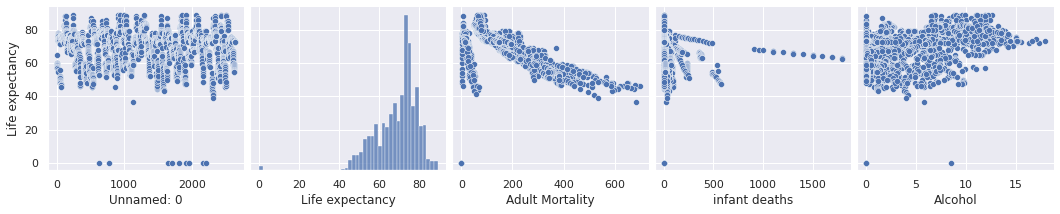

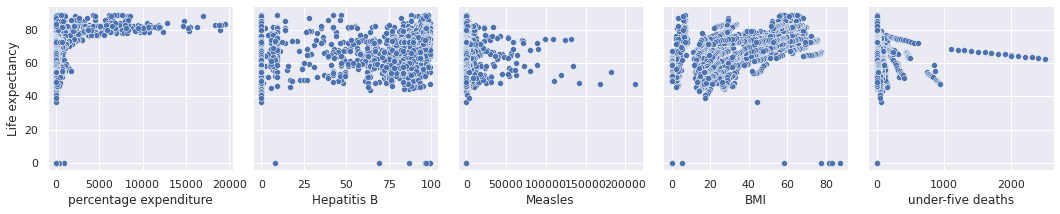

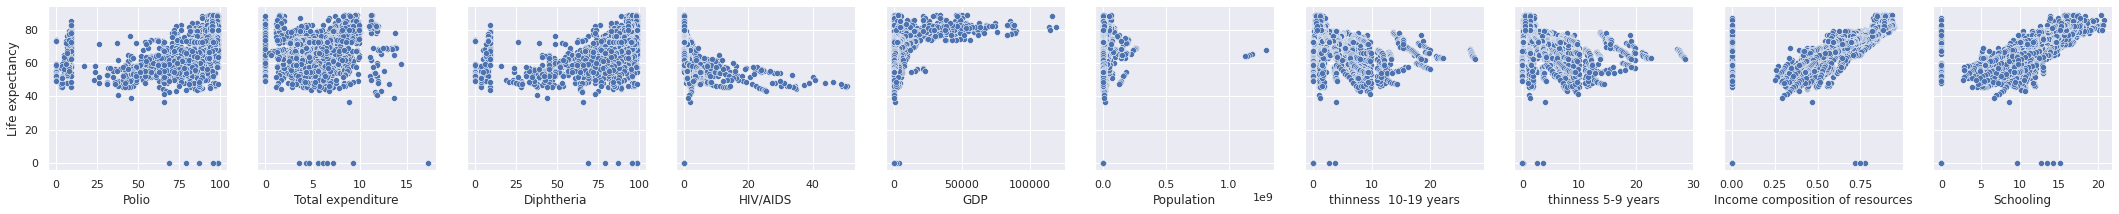

In [16]:
sns.pairplot(df, height=3, y_vars = 'Life expectancy', x_vars = df.columns[0:5], kind='scatter')
sns.pairplot(df, height=3, y_vars = 'Life expectancy', x_vars = df.columns[5:10], kind='scatter')
sns.pairplot(df, height=3, y_vars = 'Life expectancy', x_vars = df.columns[10:], kind='scatter')

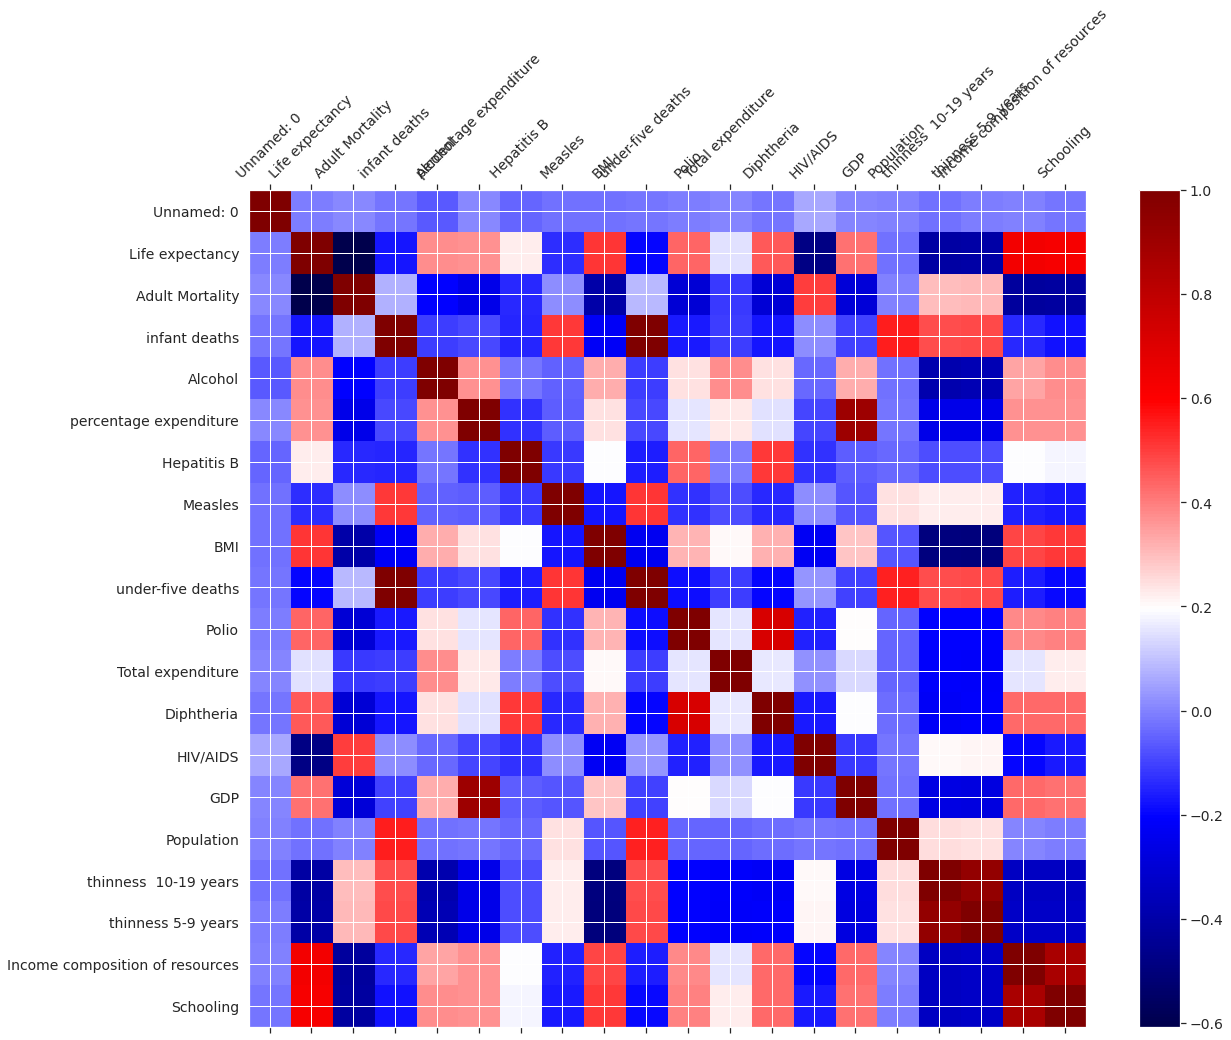

In [17]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize=14)

In [18]:
# Preprocesamiento
# Se usa un transformador para seleccionar unicamente las columnas que se quieren usar
selected_cols = ['HIV/AIDS','BMI','Income composition of resources','Adult Mortality']

pre = [('initial',ColumnTransformer([("selector", 'passthrough',selected_cols)])),]


In [19]:
# Modelo
model = [('model', LinearRegression())]

In [20]:
# Decalra el pipeline
pipeline = Pipeline(pre+model)

In [21]:
# Extraemos las variables explicativas y objetivo para entrenar
X = df.drop('Life expectancy', axis = 1)
y = df['Life expectancy']

pipeline = pipeline.fit(X,y)

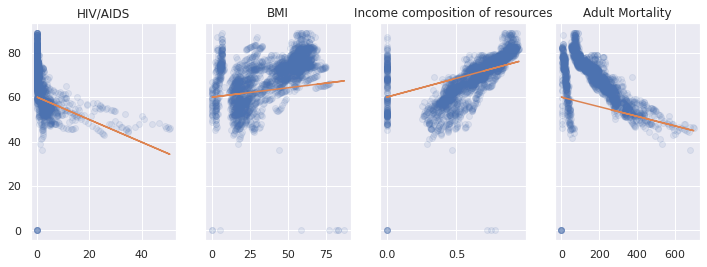

In [23]:
# Visualizamos la regresion lineal en cada dimension
f, axs = plt.subplots(1, len(selected_cols), sharey=True, figsize = (12,4))

for i in range(len(selected_cols)):

    pos_col = i
    col = selected_cols[pos_col]

    # Variable x
    x = X[col]
    # Pendiente
    m = pipeline['model'].coef_[pos_col]
    # Interceto
    b = pipeline['model'].intercept_

    axs[i].plot(x, y, 'o', alpha = 0.1)
    axs[i].plot(x, x*m + b)
    axs[i].set_title(col)


# Exportación del modelo


In [24]:
# Usamos la lbreria joblib
filename = 'pipeline.joblib'
# Se guarda (Exportación del modelo)
dump(pipeline, filename) 

['pipeline.joblib']

In [25]:
# Se lee
p2 = load(filename)
p2

Pipeline(steps=[('initial',
                 ColumnTransformer(transformers=[('selector', 'passthrough',
                                                  ['HIV/AIDS', 'BMI',
                                                   'Income composition of '
                                                   'resources',
                                                   'Adult Mortality'])])),
                ('model', LinearRegression())])

# Coeficientes

In [26]:
pipeline['model'].coef_

array([-0.50765208,  0.08386341, 16.96817051, -0.02159634])

In [27]:
# En DataFrame
pd.DataFrame({'columns':selected_cols, 'coef':pipeline['model'].coef_})

,columns,coef
0,HIV/AIDS,-0.507652
1,BMI,0.083863
2,Income composition of resources,16.968171
3,Adult Mortality,-0.021596


# Métricas

In [28]:
p2.score(X,y)

0.6043871795105944

In [39]:
y_true = y
y_predicted = p2.predict(X)

# Note que hay que sacarle la raiz al valor
np.sqrt(mse(y_true, y_predicted))

6.509792034049856